Graph Neural Networks for Fraud Detection in Crypto Transactions

---
# **Table of Contents**
---
1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
2. [**Setup and Libraries**](#Section2)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition and Description**](#Section4)<br>
5. [**Data Pre-Processing**](#Section5)<br>
6. [**Model the data**](#Section6)<br>
7. [**Summarization**](#Section7)</br>
  7.1 [**Conclusion**](#Section71)</br>
  7.2 [**Actionable Insights**](#Section72)</br>

---
<a name = Section1></a>
# **1. Introduction**
---

In this notebook, we will explore the use of Graph Neural Networks (GNNs) for fraud detection in cryptocurrency transactions. We will follow a structured workflow that includes data acquisition, preprocessing, profiling, exploratory data analysis, model building, and evaluation.

<center><img width=50% height=100% src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*DEG-vN2W7a0uui4UnfuYJA.png" alt="https://imgs.search.brave.com/nxu-A1jWLn-ErwsOyIIHILMxKlPh9n-OGY533O3bxak/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly93ZWJo/b3N0aW5nbWVkaWEu/bmV0L3dwLWNvbnRl/bnQvdXBsb2Fkcy8y/MDE4LzAxL2h0dHAt/ZXJyb3ItNDA0LW5v/dC1mb3VuZC5wbmc"></center>


---
<a name = Section2></a>
# **2. Problem Statement**
---
- **Growing concern**: Fraudulent activities in cryptocurrency transactions are on the rise due to the anonymous and decentralized nature of blockchain systems.
- **Limitations of traditional methods**: Existing fraud detection approaches are struggling to keep up with the evolving tactics used by cybercriminals in cryptocurrency networks.
- **Objective**: This project aims to detect fraudulent cryptocurrency transactions using Graph Neural Networks (GNNs) by representing users and transactions as nodes and edges in a graph.
- **Graph-based approach**: GNN models such as Graph Convolutional Networks (GCNs) and Graph Attention Networks (GATs) are utilized to capture complex transactional relationships and patterns within the graph structure.
- **Goal**: The project seeks to improve fraud detection accuracy by enhancing both precision and recall in identifying fraudulent activities in cryptocurrency ecosystems.



---
<a name = Section3></a>
# **3. Installing Libraries**
---


<a name = Section31></a>
## **3.1 Installing Libraries**



In [3]:
!pip install torch_geometric

<a name = Section32></a>
## **3.2 Upgrading Libraries**


- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [1]:
!pip install --upgrade torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00


<a name = Section33></a>
## **3.3 Upgrading Libraries**

In [2]:
# Import necessary libraries

import os  # Provides a way of using operating system dependent functionality like file system operations
import copy  # Used to make deep or shallow copies of objects, useful when dealing with mutable objects in graphs
import torch  # Core library for building and training deep learning models (PyTorch framework)
import warnings  # Handles warnings in the script, allowing us to suppress or display specific types of warnings

import numpy as np  # Fundamental package for numerical computations in Python, especially for working with arrays and matrices
import pandas as pd  # Provides powerful data structures like DataFrames for handling and analyzing structured data

import networkx as nx  # Library for creating, analyzing, and manipulating complex networks and graph structures

import seaborn as sns  # Statistical data visualization library built on top of matplotlib
import matplotlib.pyplot as plt  # Low-level plotting library used to create static, animated, or interactive plots

# Sklearn is widely used for machine learning algorithms and performance metrics
from sklearn.metrics import confusion_matrix, classification_report  # Metrics for evaluating the classification performance
from sklearn.model_selection import train_test_split  # Utility to split datasets into training and testing sets

# PyTorch Geometric modules:
from torch_geometric.utils import to_networkx  # Converts a PyTorch Geometric graph into a NetworkX graph object for visualization
from torch_geometric.data import Data, DataLoader  # Data structure for storing graph data and DataLoader for batching the graph data

# PyTorch Neural Network Modules:
from torch.nn import Linear, Dropout  # Linear (fully​ connected neural network)

import torch.nn.functional as F  # Provides various neural network functions (like ReLU, softmax, etc.) and loss functions
from torch_geometric.nn import GCNConv, GATv2Conv  # Graph Convolutional Network (GCN) and Graph Attention Network (GAT) layers

In [5]:
# Check for GPU device
print(torch.cuda.is_available())  # Should return True if a GPU is available
print(torch.cuda.device_count())  # Should return the number of GPUs available
print(torch.cuda.current_device())  # Should return the index of the current device
print(torch.cuda.get_device_name(0))  # Should return the name of the GPU

True
1
0
Tesla T4


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


In [3]:
from torch_geometric.datasets import EllipticBitcoinDataset
dataset = EllipticBitcoinDataset(root='./data/elliptic-bitcoin-dataset')

Processing...
Done!


In [4]:
df_features = pd.read_csv('/content/data/elliptic-bitcoin-dataset/raw/elliptic_txs_features.csv', header=None)
df_edges = pd.read_csv("/content/data/elliptic-bitcoin-dataset/raw/elliptic_txs_edgelist.csv")
df_classes =  pd.read_csv("/content/data/elliptic-bitcoin-dataset/raw/elliptic_txs_classes.csv")
df_classes['class'] = df_classes['class'].map({'unknown': 2, '1': 1, '2': 0})

---
  4.1 Data Description
---  
The Elliptic Data Set associates Bitcoin transactions with real-world entities, categorizing them into either licit groups (such as exchanges, wallet providers, miners, and other legal services) or illicit groups (including scams, malware, terrorist organizations, ransomware, and Ponzi schemes). The primary objective of the dataset is to classify nodes in the transaction graph as either licit or illicit based on their associated activities.


**Citation**
- Elliptic, www.elliptic.co.
- M. Weber, G. Domeniconi, J. Chen, D. K. I. Weidele, C. Bellei, T. Robinson, C. E. Leiserson, "Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics", KDD ’19 Workshop on Anomaly Detection in Finance, August 2019, Anchorage, AK, USA.

**Content**
- This dataset, anonymized for privacy, represents a transaction graph derived from the Bitcoin blockchain. Each node corresponds to a transaction, while edges depict the flow of Bitcoins between transactions. Every node is characterized by 166 features and is labeled as originating from either a “licit”, “illicit”, or “unknown” entity.

**Nodes and Edges**
- Each node in the dataset is linked to 166 features, although the exact details of these features cannot be disclosed due to intellectual property constraints. A time step is also associated with each node, indicating when the transaction was broadcasted to the Bitcoin network. These time steps range from 1 to 49, spaced approximately two weeks apart. Within each time step, transactions form a single connected component, where all transactions occurred within a time span of less than three hours. Importantly, there are no connections (edges) between nodes across different time steps.

- The first 94 features capture local details about each transaction, such as the time step, the number of inputs and outputs, transaction fees, output volume, and summary statistics like the average BTC received or spent by the inputs/outputs, as well as the average number of incoming and outgoing transactions linked to them. The remaining 72 features are aggregated metrics derived from transactions that are one-hop away from the central node, including the maximum, minimum, standard deviation, and correlation coefficients of neighboring transactions for similar attributes, such as the number of inputs/outputs and transaction fees.

---
  4.2 Data Information
---  
  - In this section I will get information about the data and check for some observations

In [30]:
# here column 0 stands for node_id, column 1 is the time axis
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [29]:
df_edges.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [28]:
df_classes.head()

,txId,class
0,230425980,2
1,5530458,2
2,232022460,2
3,232438397,0
4,230460314,2


In [27]:
df_classes['class'].value_counts()

,count
class,
2,157205
0,42019
1,4545


In [10]:
# Overview of the dataset
# Load the dataset
# Print dataset information
print(f"Number of graphs in the dataset: {len(dataset)}")
print(f"Number of features per node: {dataset.num_node_features}")
print(f"Number of classes: {dataset.num_classes}")

# Access the first graph in the dataset
data = dataset[0]

# Print key attributes of the graph data
print("\nGraph Data:")
print(f"Node feature matrix shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")
print(f"Label shape: {data.y.shape}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Graph is directed: {data.is_directed()}")

# Print some sample data
print("\nSample Features and Labels:")
print(f"First node features: {data.x[0]}")
print(f"Edge indices: {data.edge_index[:, :5]}")  # Print first 5 edges
print(f"First 5 node labels: {data.y[:5]}")

Number of graphs in the dataset: 1
Number of features per node: 165
Number of classes: 2

Graph Data:
Node feature matrix shape: torch.Size([203769, 165])
Edge index shape: torch.Size([2, 234355])
Label shape: torch.Size([203769])
Number of nodes: 203769
Number of edges: 234355
Graph is directed: True

Sample Features and Labels:
First node features: tensor([-1.7147e-01, -1.8467e-01, -1.2014e+00, -1.2197e-01, -4.3875e-02,
        -1.1300e-01, -6.1584e-02, -1.6210e-01, -1.6793e-01, -4.9707e-02,
        -1.6440e-01, -2.8741e-02, -3.5391e-02, -4.2955e-02, -1.3282e-02,
        -5.7195e-02, -1.6961e-01, -1.7115e-01, -1.7447e-01, -1.3737e+00,
        -1.3715e+00, -1.3973e-01, -1.4891e-01, -8.0147e-02, -1.5566e-01,
        -1.0763e-02, -1.2107e-02, -1.3973e-01, -1.4891e-01, -8.0147e-02,
        -1.5566e-01, -1.0669e-02, -1.2005e-02, -2.4669e-02, -3.1272e-02,
        -2.3045e-02, -2.6215e-02,  1.4278e-03,  1.4826e-03, -2.2722e-01,
        -2.3937e-01, -7.5256e-02, -2.3495e-01,  3.7468e-02,  4.

---
<a name = Section5></a>
# **5. Data Preprocessing**
---

**Merging node features DF with classes DF**

In [11]:
df_merge = df_features.merge(df_classes, how='left', right_on="txId", left_on=0)
df_merge = df_merge.sort_values(0).reset_index(drop=True)

**Extracting classified/non-classified nodes**


In [12]:
classified = df_merge.loc[df_merge['class'].loc[df_merge['class']!=2].index].drop('txId', axis=1)
unclassified = df_merge.loc[df_merge['class'].loc[df_merge['class']==2].index].drop('txId', axis=1)

**Extracting classified/non-classified edges**


In [13]:
classified_edges = df_edges.loc[df_edges['txId1'].isin(classified[0]) & df_edges['txId2'].isin(classified[0])]
unclassifed_edges = df_edges.loc[df_edges['txId1'].isin(unclassified[0]) | df_edges['txId2'].isin(unclassified[0])]

**Preparing Edges**

In [14]:
# mapping nodes to indices
nodes = df_merge[0].values
map_id = {j:i for i,j in enumerate(nodes)}

# mapping edges to indices
edges = df_edges.copy()
edges.txId1 = edges.txId1.map(map_id)
edges.txId2 = edges.txId2.map(map_id)
edges = edges.astype(int)

edge_index = np.array(edges.values).T
edge_index = torch.tensor(edge_index, dtype=torch.long).contiguous()

# weights for the edges are equal in case of model without attention
weights = torch.tensor([1] * edge_index.shape[1] , dtype=torch.float32)

print("Total amount of edges in DAG:", edge_index.shape)

Total amount of edges in DAG: torch.Size([2, 234355])


**Preparing Nodes**
- Let’s ignore the temporal axis and consider the static case of fraud detection.


In [15]:
# maping node ids to corresponding indexes
node_features = df_merge.drop(['txId'], axis=1).copy()
node_features[0] = node_features[0].map(map_id)

classified_idx = node_features['class'].loc[node_features['class']!=2].index
unclassified_idx = node_features['class'].loc[node_features['class']==2].index

# replace unkown class with 0, to avoid having 3 classes, this data/labels never used in training
node_features['class'] = node_features['class'].replace(2, 0)

labels = node_features['class'].values

# drop indeces, class and temporal axes
node_features = torch.tensor(np.array(node_features.drop([0, 'class', 1], axis=1).values, dtype=np.float32), dtype=torch.float32)

**Converting data to Pygeometric graph data formatt**


In [16]:
elliptic_dataset = Data(x = node_features,
                        edge_index = edge_index,
                        edge_attr = weights,
                        y = torch.tensor(labels, dtype=torch.float32))

print(f'Number of nodes: {elliptic_dataset.num_nodes}')
print(f'Number of node features: {elliptic_dataset.num_features}')
print(f'Number of edges: {elliptic_dataset.num_edges}')
print(f'Number of edge features: {elliptic_dataset.num_features}')
print(f'Average node degree: {elliptic_dataset.num_edges / elliptic_dataset.num_nodes:.2f}')
print(f'Number of classes: {len(np.unique(elliptic_dataset.y))}')
print(f'Has isolated nodes: {elliptic_dataset.has_isolated_nodes()}')
print(f'Has self loops: {elliptic_dataset.has_self_loops()}')
print(f'Is directed: {elliptic_dataset.is_directed()}')

Number of nodes: 203769
Number of node features: 165
Number of edges: 234355
Number of edge features: 165
Average node degree: 1.15
Number of classes: 2
Has isolated nodes: False
Has self loops: False
Is directed: True


In [17]:
class Config:
    seed = 0
    learning_rate = 0.001
    weight_decay = 1e-5
    input_dim = 165
    output_dim = 1
    hidden_size = 128
    num_epochs = 100
    checkpoints_dir = './models/elliptic_gnn'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Using device:", Config.device)

Using device: cuda


In [19]:
# Splitting train and validation dataset
y_train = labels[classified_idx]

# spliting train set and validation set
_, _, _, _, train_idx, valid_idx = \
    train_test_split(node_features[classified_idx],
                     y_train,
                     classified_idx,
                     test_size=0.15,
                     random_state=Config.seed,
                     stratify=y_train)

elliptic_dataset.train_idx = torch.tensor(train_idx, dtype=torch.long)
elliptic_dataset.val_idx = torch.tensor(valid_idx, dtype=torch.long)
elliptic_dataset.test_idx = torch.tensor(unclassified_idx, dtype=torch.long)

print("Train dataset size:", elliptic_dataset.train_idx.shape[0])
print("Validation dataset size:", elliptic_dataset.val_idx.shape[0])
print("Test dataset size:", elliptic_dataset.test_idx.shape[0])

Train dataset size: 39579
Validation dataset size: 6985
Test dataset size: 157205


---
<a name = Section6></a>
# **6. Model the Data**
---

In [18]:
class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super(GCN, self).__init__()

        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        out = self.gcn2(h, edge_index)
        return out

class GAT(torch.nn.Module):
    """Graph Attention Network"""
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super(GAT, self).__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads, dropout=0.6)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, concat=False, heads=1, dropout=0.6)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(h, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        out = self.gat2(h, edge_index)
        return out

def accuracy(y_pred, y_test, prediction_threshold=0.5):
    y_pred_label = (torch.sigmoid(y_pred) > prediction_threshold).float()*1

    correct_results_sum = (y_pred_label == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]

    return acc

##Train-test helpers

In [20]:
def train_evaluate(model, data, criterion, optimizer, *args):
    num_epochs = args[0]
    checkpoints_dir = args[1]
    model_filename = args[2]

    best_model_wts = copy.deepcopy(model.state_dict())

    best_loss = 10e10

    if not os.path.exists(checkpoints_dir):
        os.makedirs(checkpoints_dir)

    model.train()
    for epoch in range(num_epochs+1):
        # Training
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_idx], data.y[data.train_idx].unsqueeze(1))
        acc = accuracy(out[data.train_idx], data.y[data.train_idx].unsqueeze(1), prediction_threshold=0.5)
        loss.backward()
        optimizer.step()

        # Validation
        val_loss = criterion(out[data.val_idx], data.y[data.val_idx].unsqueeze(1))
        val_acc = accuracy(out[data.val_idx], data.y[data.val_idx].unsqueeze(1), prediction_threshold=0.5)

        if(epoch % 10 == 0):
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: '
                  f'{acc*100:>6.2f}% | Val Loss: {val_loss:.2f} | '
                  f'Val Acc: {val_acc*100:.2f}%')

            if val_loss < best_loss:
                best_loss = val_loss
                print("Saving model for best loss")
                checkpoint = {
                    'state_dict': best_model_wts
                }
                torch.save(checkpoint, os.path.join(checkpoints_dir, model_filename))
                best_model_wts = copy.deepcopy(model.state_dict())

    return model

def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    preds = ((torch.sigmoid(out) > 0.5).float()*1).squeeze(1)
    return preds

##Train GCN

In [31]:
gcn_model = GCN(Config.input_dim, Config.hidden_size, Config.output_dim).to(Config.device)
data_train = elliptic_dataset.to(Config.device)

optimizer = torch.optim.Adam(gcn_model.parameters(), lr=Config.learning_rate, weight_decay=Config.weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
criterion = torch.nn.BCEWithLogitsLoss()

train_evaluate(gcn_model,
              data_train,
              criterion,
              optimizer,
              Config.num_epochs,
              Config.checkpoints_dir,
              'gcn_best_model.pth.tar')

Epoch   0 | Train Loss: 0.695 | Train Acc:  64.24% | Val Loss: 0.70 | Val Acc: 63.92%
Saving model for best loss
Epoch  10 | Train Loss: 0.299 | Train Acc:  87.63% | Val Loss: 0.30 | Val Acc: 87.33%
Saving model for best loss
Epoch  20 | Train Loss: 0.254 | Train Acc:  90.08% | Val Loss: 0.25 | Val Acc: 89.66%
Saving model for best loss
Epoch  30 | Train Loss: 0.240 | Train Acc:  90.89% | Val Loss: 0.24 | Val Acc: 91.04%
Saving model for best loss
Epoch  40 | Train Loss: 0.230 | Train Acc:  91.47% | Val Loss: 0.23 | Val Acc: 91.31%
Saving model for best loss
Epoch  50 | Train Loss: 0.217 | Train Acc:  92.06% | Val Loss: 0.22 | Val Acc: 91.85%
Saving model for best loss
Epoch  60 | Train Loss: 0.210 | Train Acc:  92.36% | Val Loss: 0.21 | Val Acc: 92.15%
Saving model for best loss
Epoch  70 | Train Loss: 0.205 | Train Acc:  92.62% | Val Loss: 0.21 | Val Acc: 92.51%
Saving model for best loss
Epoch  80 | Train Loss: 0.202 | Train Acc:  92.79% | Val Loss: 0.20 | Val Acc: 92.93%
Saving mod

GCN(
  (gcn1): GCNConv(165, 128)
  (gcn2): GCNConv(128, 1)
)

##Test GCN

<ipython-input-35-be1011325d99>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gcn_model.load_state_dict(torch.load(os.path.join(Config.checkpoints_dir, 'gcn_best_model.pt

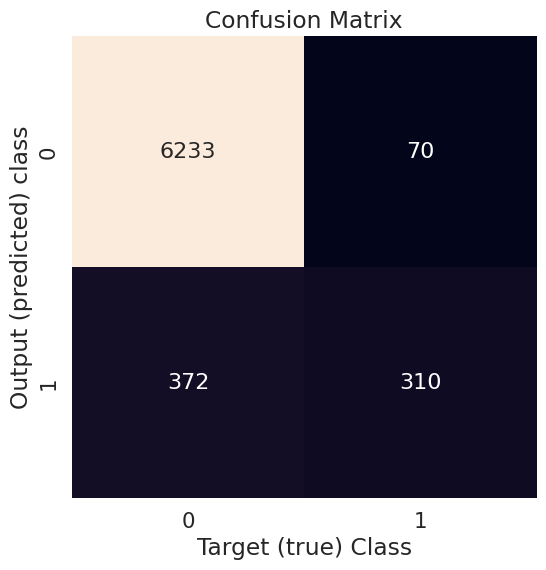

              precision    recall  f1-score   support

       licit       0.94      0.99      0.97      6303
     illicit       0.82      0.45      0.58       682

    accuracy                           0.94      6985
   macro avg       0.88      0.72      0.77      6985
weighted avg       0.93      0.94      0.93      6985

Test data fraud cases, percentage: 6.457173754015458 %


In [35]:
gcn_model.load_state_dict(torch.load(os.path.join(Config.checkpoints_dir, 'gcn_best_model.pth.tar'))['state_dict'])

y_test_preds = test(gcn_model, data_train)

# confusion matrix on validation data
conf_mat = confusion_matrix(data_train.y[data_train.val_idx].detach().cpu().numpy(), y_test_preds[valid_idx].cpu().numpy())

plt.subplots(figsize=(6,6))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat, annot=True, fmt=".0f", annot_kws={"size": 16}, cbar=False)
plt.xlabel('Target (true) Class'); plt.ylabel('Output (predicted) class'); plt.title('Confusion Matrix')
plt.show();

print(classification_report(data_train.y[data_train.val_idx].detach().cpu().numpy(),
                            y_test_preds[valid_idx].cpu().numpy(),
                            target_names=['licit', 'illicit']))


print(f"Test data fraud cases, percentage: {y_test_preds[data_train.test_idx].detach().cpu().numpy().sum() / len(data_train.y[data_train.test_idx]) *100} %")

## Train GAT

In [21]:
gat_model = GAT(Config.input_dim, Config.hidden_size, Config.output_dim).to(Config.device)
data_train = elliptic_dataset.to(Config.device)

optimizer = torch.optim.Adam(gat_model.parameters(), lr=Config.learning_rate, weight_decay=Config.weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
criterion = torch.nn.BCEWithLogitsLoss()

train_evaluate(gat_model,
               data_train,
               criterion,
               optimizer,
               Config.num_epochs,
               Config.checkpoints_dir,
               'gat_best_model.pth.tar')

Epoch   0 | Train Loss: 1.660 | Train Acc:  65.18% | Val Loss: 1.55 | Val Acc: 65.21%
Saving model for best loss
Epoch  10 | Train Loss: 0.515 | Train Acc:  88.31% | Val Loss: 0.51 | Val Acc: 88.38%
Saving model for best loss
Epoch  20 | Train Loss: 0.502 | Train Acc:  90.04% | Val Loss: 0.50 | Val Acc: 90.04%
Saving model for best loss
Epoch  30 | Train Loss: 0.473 | Train Acc:  90.20% | Val Loss: 0.49 | Val Acc: 89.88%
Saving model for best loss
Epoch  40 | Train Loss: 0.459 | Train Acc:  90.22% | Val Loss: 0.46 | Val Acc: 89.98%
Saving model for best loss
Epoch  50 | Train Loss: 0.445 | Train Acc:  90.38% | Val Loss: 0.43 | Val Acc: 90.26%
Saving model for best loss
Epoch  60 | Train Loss: 0.447 | Train Acc:  90.33% | Val Loss: 0.44 | Val Acc: 90.29%
Epoch  70 | Train Loss: 0.432 | Train Acc:  90.46% | Val Loss: 0.44 | Val Acc: 90.42%
Epoch  80 | Train Loss: 0.425 | Train Acc:  90.51% | Val Loss: 0.42 | Val Acc: 90.67%
Saving model for best loss
Epoch  90 | Train Loss: 0.428 | Train

GAT(
  (gat1): GATv2Conv(165, 128, heads=8)
  (gat2): GATv2Conv(1024, 1, heads=1)
)

## Inference

<ipython-input-26-013d352d5ac8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gat_model.load_state_dict(torch.load(os.path.join(Config.checkpoints_dir, 'gat_best_model.pt

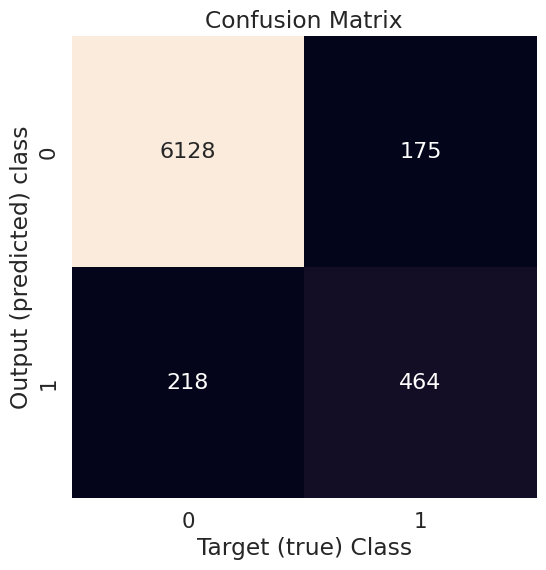

              precision    recall  f1-score   support

       licit       0.97      0.97      0.97      6303
     illicit       0.73      0.68      0.70       682

    accuracy                           0.94      6985
   macro avg       0.85      0.83      0.84      6985
weighted avg       0.94      0.94      0.94      6985

Test data fraud cases, percentage: 14.034540886104132 %


In [26]:
gat_model.load_state_dict(torch.load(os.path.join(Config.checkpoints_dir, 'gat_best_model.pth.tar'))['state_dict'])

y_test_preds = test(gat_model, data_train)

# confusion matrix on validation data
conf_mat = confusion_matrix(data_train.y[data_train.val_idx].detach().cpu().numpy(), y_test_preds[valid_idx].cpu().numpy())

plt.subplots(figsize=(6,6))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat, annot=True, fmt=".0f", annot_kws={"size": 16}, cbar=False)
plt.xlabel('Target (true) Class'); plt.ylabel('Output (predicted) class'); plt.title('Confusion Matrix')
plt.show();

print(classification_report(data_train.y[data_train.val_idx].detach().cpu().numpy(),
                            y_test_preds[valid_idx].cpu().numpy(),
                            target_names=['licit', 'illicit']))


print(f"Test data fraud cases, percentage: {y_test_preds[data_train.test_idx].detach().cpu().numpy().sum() / len(data_train.y[data_train.test_idx]) *100} %")

---
<a name = Section7></a>
# **7. Sumarization**

---
**Objective**
- The project focuses on detecting fraudulent activities in cryptocurrency transactions using Graph Neural Networks (GNNs), specifically Graph Convolutional Networks (GCNs) and Graph Attention Networks (GATs).

**Dataset**
- The Elliptic Bitcoin Dataset is used, representing Bitcoin transactions as a graph where nodes are transactions, and edges represent the flow of Bitcoin between them. Each node has 166 features and is labeled as either licit, illicit, or unknown.

**Preprocessing**
- Node and edge features are extracted, and the graph data is processed into PyTorch Geometric format. The dataset is split into training, validation, and test sets.

**Models**:
- **GCN (Graph Convolutional Network)**: A two-layer GCN is implemented to perform semi-supervised classification of licit and illicit transactions.
- **GAT (Graph Attention Network)**: A two-layer GAT is used to capture more complex relationships by applying attention mechanisms on the graph's edges.
Training & Evaluation: Both models are trained using the Binary Cross Entropy Loss function and Adam optimizer, with accuracy and recall as key metrics. Validation and testing are performed using labeled data, with unlabelled data used to assess generalization.

**Results**:
- The GAT model converges slower than GCN but provides a higher recall for fraud detection (improving from 0.45 to 0.67).
- On unlabelled data, the GCN model detects 6% fraud cases, while GAT identifies about 18% fraud cases, showing GAT's stricter approach to identifying fraudulent transactions.